# WeatherPy
----

#### Analysis

Here are three observations that can be made regarding the WeatherPy data set and its plots. The key question driving this exploration was if a city's temperature is hotter if it's located closer to the equator. Therefore, we will center our analysis on the answer:
1) The plot that seems to answer the question that began our quest for knowledge ("are countries closer to the equator hotter") is answered by the scatterplot of latitude versus temperature. The highest temperatures of this sample set of data are located at the zero latitude index, the equator. Although the temperatures are significantly colder at higher positive latitudes, there is still a dip in the temperatures that are at negative latitudes. Although this would need further research, it is possible there are fewer global cities located beneath -60 latitude, whereas there may be a greater number of cities that could be included between +60 and +80 latitude.
2) This is reinforced by the two plots Northern Hemisphere Latitude v. Max Temp and Southern Hemisphere v. Max Temp. The northern hemisphere moves from a meeting point of 0 latitude and max temperatures hovering at 30 and moves down to the right as latitude increases and temperature decreases. The southern hemisphere plot seems to show fewer cities, but it moves opposite of the norther hemisphere plot, with latitude increasing and temperature increasing.
Now that we have answered that question, I will note:
3) There seems to be few consistent trends in this data otherwise. Cloudiness stands out as a metric that does not seem to have any certain pattern across these cities.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [64]:
# Perform an API call
# Initiate variables and store the retrieved data into a dataframe

print("-----------------------------")  
print("Beginning Data Retrieval")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

metrics = []
city_counter = 0

for city in cities:
    
    city_counter += 1
    print(f"Processing Record Number {city_counter}")
    
    try: 
    
        # Build query URL and request your results in Celsius
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        name = weather_json["name"]
        temperature = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloudiness = weather_json['clouds']['all']
        wind_speed = weather_json['wind']['speed']
        latitude = weather_json['coord']['lat']
        longitude = weather_json['coord']['lon']
        metrics.append({"name": name,
                        "temperature": temperature,
                       "humidity": humidity,
                       "cloudiness": cloudiness,
                       "wind_speed": wind_speed,
                       "latitude": latitude,
                       "longitude": longitude})
        
    
    except: 
        print('No City Records Found')
        

-----------------------------
Beginning Data Retrieval
Processing Record Number 1
No City Records Found
Processing Record Number 2
Processing Record Number 3
Processing Record Number 4
Processing Record Number 5
Processing Record Number 6
Processing Record Number 7
Processing Record Number 8
Processing Record Number 9
Processing Record Number 10
Processing Record Number 11
Processing Record Number 12
Processing Record Number 13
Processing Record Number 14
Processing Record Number 15
Processing Record Number 16
Processing Record Number 17
No City Records Found
Processing Record Number 18
Processing Record Number 19
Processing Record Number 20
Processing Record Number 21
Processing Record Number 22
Processing Record Number 23
Processing Record Number 24
Processing Record Number 25
Processing Record Number 26
Processing Record Number 27
Processing Record Number 28
Processing Record Number 29
No City Records Found
Processing Record Number 30
Processing Record Number 31
Processing Record Nu

Processing Record Number 268
Processing Record Number 269
No City Records Found
Processing Record Number 270
Processing Record Number 271
Processing Record Number 272
Processing Record Number 273
Processing Record Number 274
Processing Record Number 275
Processing Record Number 276
Processing Record Number 277
Processing Record Number 278
Processing Record Number 279
Processing Record Number 280
No City Records Found
Processing Record Number 281
Processing Record Number 282
Processing Record Number 283
Processing Record Number 284
Processing Record Number 285
Processing Record Number 286
Processing Record Number 287
Processing Record Number 288
Processing Record Number 289
Processing Record Number 290
Processing Record Number 291
Processing Record Number 292
Processing Record Number 293
Processing Record Number 294
Processing Record Number 295
Processing Record Number 296
Processing Record Number 297
Processing Record Number 298
Processing Record Number 299
Processing Record Number 300

Processing Record Number 533
Processing Record Number 534
Processing Record Number 535
Processing Record Number 536
Processing Record Number 537
Processing Record Number 538
Processing Record Number 539
Processing Record Number 540
Processing Record Number 541
Processing Record Number 542
Processing Record Number 543
Processing Record Number 544
Processing Record Number 545
No City Records Found
Processing Record Number 546
Processing Record Number 547
No City Records Found
Processing Record Number 548
Processing Record Number 549
Processing Record Number 550
Processing Record Number 551
Processing Record Number 552
Processing Record Number 553
Processing Record Number 554
Processing Record Number 555
Processing Record Number 556
Processing Record Number 557
Processing Record Number 558
Processing Record Number 559
Processing Record Number 560
Processing Record Number 561
Processing Record Number 562
Processing Record Number 563
Processing Record Number 564
Processing Record Number 565

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
# Printed out the json file in order to reference in the case of updating the dataframe
weather_json

{'coord': {'lon': 120.73, 'lat': 49.28},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': -22.63,
  'feels_like': -28.4,
  'temp_min': -22.63,
  'temp_max': -22.63,
  'pressure': 1027,
  'humidity': 91,
  'sea_level': 1027,
  'grnd_level': 928},
 'wind': {'speed': 2.96, 'deg': 344},
 'clouds': {'all': 31},
 'dt': 1584220213,
 'sys': {'country': 'CN', 'sunrise': 1584223840, 'sunset': 1584266487},
 'timezone': 28800,
 'id': 2033536,
 'name': 'Yakeshi',
 'cod': 200}

In [66]:
# Store the data frame into a csv file for the Vacation activity
cities_df = pd.DataFrame(metrics)
cities_df.to_csv('cities_df.csv', index=False)

In [67]:
# Print the dataframe to ensure it looks correct
cities_df

,name,temperature,humidity,cloudiness,wind_speed,latitude,longitude
0,Lebedyan',2.00,93,90,7.00,53.02,39.17
1,Atlantic City,12.63,22,75,4.10,39.36,-74.42
2,Iqaluit,-25.77,62,20,6.70,63.75,-68.51
3,Punta Arenas,15.00,58,75,9.30,-53.15,-70.92
4,Dubbo,12.00,81,0,5.10,-32.25,148.62
...,...,...,...,...,...,...,...
537,Scottsbluff,0.11,80,90,7.70,41.87,-103.67
538,Yining,7.67,67,0,0.40,29.04,114.56
539,Fes,19.00,63,40,3.60,34.04,-5.00
540,Karaton,25.80,83,20,1.50,-6.34,106.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

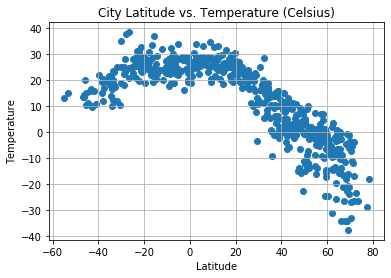

<Figure size 432x288 with 0 Axes>

In [68]:
# Proceed with plotting the requested data sets

latitude = cities_df['latitude']
temperature = cities_df['temperature']
plt.scatter(latitude, temperature)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.title("City Latitude vs. Temperature (Celsius)")
plt.grid()
plt.show()
plt.savefig("Images/lat_v_temp.png")


#### Latitude vs. Humidity Plot

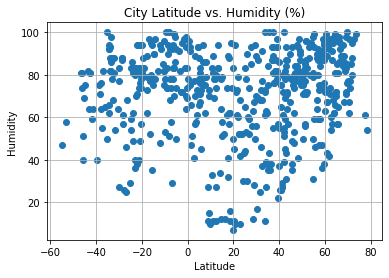

<Figure size 432x288 with 0 Axes>

In [69]:
latitude = cities_df['latitude']
humidity = cities_df['humidity']
plt.scatter(latitude, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title('City Latitude vs. Humidity (%)')
plt.grid()
plt.show()
plt.savefig("Images/lat_v_hum.png")

#### Latitude vs. Cloudiness Plot

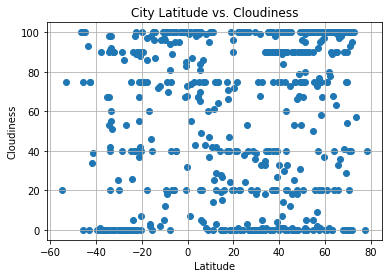

<Figure size 432x288 with 0 Axes>

In [70]:
latitude = cities_df['latitude']
cloudiness = cities_df['cloudiness']
plt.scatter(latitude, cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('City Latitude vs. Cloudiness')
plt.grid()
plt.show()
plt.savefig("Images/lat_v_cloudy.png")

#### Latitude vs. Wind Speed Plot

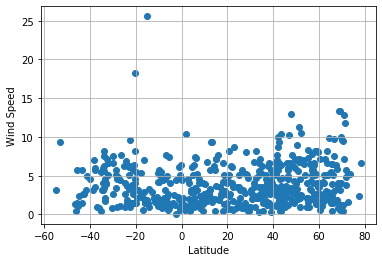

<Figure size 432x288 with 0 Axes>

In [71]:
latitude = cities_df['latitude']
wind_speed = cities_df['wind_speed']
plt.scatter(latitude, wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid()
plt.show()
plt.savefig("Images/lat_v_wind_speed.png")

## Linear Regression

In [72]:
# Create a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Run regresson on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(0,0),text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-squared is: {rvalue}")
    plt.show()
    plt.savefig("Images/")

In [73]:
# Create Northern and Southern Hemisphere DataFrames
northern_df = cities_df.loc[cities_df['latitude']>=0]
southern_df = cities_df.loc[cities_df['latitude']<0]

In [74]:
# Print the dataframe as a quick check for any negative latitude values
northern_df

,name,temperature,humidity,cloudiness,wind_speed,latitude,longitude
0,Lebedyan',2.00,93,90,7.00,53.02,39.17
1,Atlantic City,12.63,22,75,4.10,39.36,-74.42
2,Iqaluit,-25.77,62,20,6.70,63.75,-68.51
7,Oktyabr'skoye,9.17,84,100,1.15,43.06,44.74
9,Tommot,-24.73,91,100,1.38,58.96,126.29
...,...,...,...,...,...,...,...
536,Berlevåg,-5.53,74,93,12.82,70.86,29.09
537,Scottsbluff,0.11,80,90,7.70,41.87,-103.67
538,Yining,7.67,67,0,0.40,29.04,114.56
539,Fes,19.00,63,40,3.60,34.04,-5.00


In [75]:
# Print the dataframe to check for any positive latitude values 
southern_df

,name,temperature,humidity,cloudiness,wind_speed,latitude,longitude
3,Punta Arenas,15.00,58,75,9.30,-53.15,-70.92
4,Dubbo,12.00,81,0,5.10,-32.25,148.62
5,Lebu,17.07,55,0,6.00,-37.62,-73.65
6,Airai,17.77,83,18,1.30,-8.93,125.41
8,Busselton,18.14,98,98,4.52,-33.65,115.33
...,...,...,...,...,...,...,...
514,Salta,28.27,54,40,2.60,-24.79,-65.41
518,Peruíbe,25.57,86,26,6.91,-24.32,-47.00
529,San Matías,33.57,52,3,2.93,-16.37,-58.40
532,Lumeje,20.07,92,96,1.63,-11.55,20.78


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8928655190138421


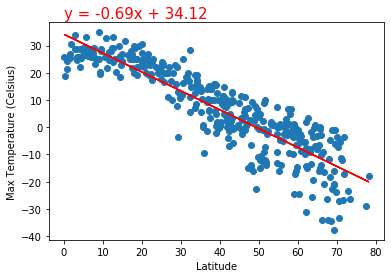

<Figure size 432x288 with 0 Axes>

In [76]:
# Proceed with plotting the data by norther and southern hemispheres

n_max_temp = northern_df['temperature']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_max_temp, 'Max Temperature (Celsius)', (0,40))
plt.savefig("Images/ntemp_v_lat.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5760604270617573


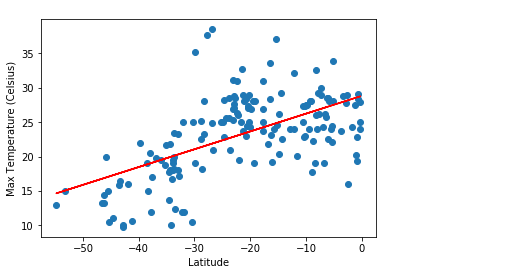

<Figure size 432x288 with 0 Axes>

In [77]:
s_max_temp = southern_df['temperature']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_max_temp, 'Max Temperature (Celsius)', (0,40))
plt.savefig("Images/stemp_v_lat.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2803228565464979


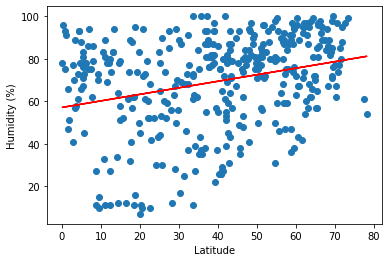

<Figure size 432x288 with 0 Axes>

In [78]:
n_humidity = northern_df['humidity']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_humidity, 'Humidity (%)', (0,40))
plt.savefig("Images/nhum_v_lat.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.23350243060060039


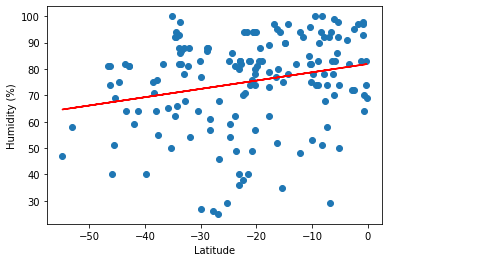

<Figure size 432x288 with 0 Axes>

In [79]:
s_humidity = southern_df['humidity']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_humidity, 'Humidity (%)', (0,40))
plt.savefig("Images/shum_v_lat.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.13208061610594163


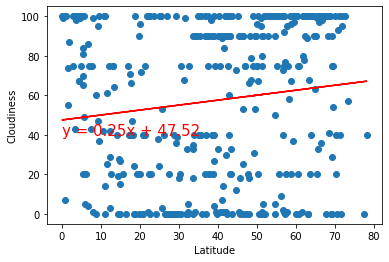

<Figure size 432x288 with 0 Axes>

In [80]:
n_cloudiness = northern_df['cloudiness']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_cloudiness, 'Cloudiness', (0,40))
plt.savefig("Images/nhum_v_lat.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.24957085537379048


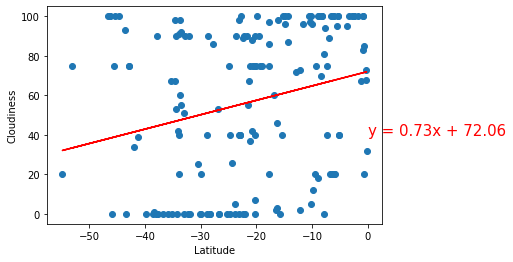

<Figure size 432x288 with 0 Axes>

In [81]:
s_cloudiness = southern_df['cloudiness']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_cloudiness, 'Cloudiness', (0,40))
plt.savefig("Images/nhum_v_lat.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.2121307872411594


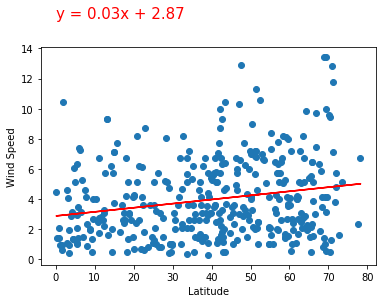

<Figure size 432x288 with 0 Axes>

In [82]:
n_wind_speed = northern_df['wind_speed']
n_latitude = northern_df['latitude']

plot_linear_regression(n_latitude, n_wind_speed, 'Wind Speed', (0,16))
plt.savefig("Images/nhum_v_lat.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1222354294306372


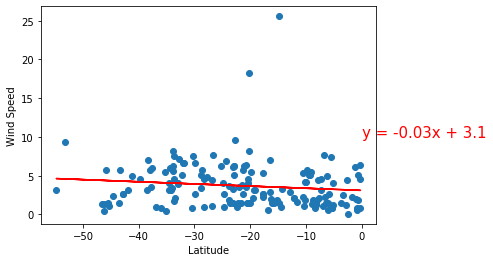

<Figure size 432x288 with 0 Axes>

In [83]:
s_wind_speed = southern_df['wind_speed']
s_latitude = southern_df['latitude']

plot_linear_regression(s_latitude, s_wind_speed, 'Wind Speed', (0,10))
plt.savefig("Images/nhum_v_lat.png")